## **Chapter 2. Data Understanding**
In this section, we explore the dataset to get a better understanding of it

### **2.1 Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from wordcloud import WordCloud

### **2.2 Load and Preview Data**

In [1]:
import zipfile
import os

with zipfile.ZipFile("../data/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")
    
print("Files extracted successfully!")

Files extracted successfully!


In [2]:
os.listdir("unzipped_data")

['Fake.csv', 'True.csv']

In [ ]:
fake_df = pd.read_csv("unzipped_data/Fake.csv")
true_df = pd.read_csv("unzipped_data/True.csv")

print("Fake News Dataset:", fake_df.shape)
print("True News Dataset:", true_df.shape)

fake_df.head()

Fake News Dataset: (23481, 4)
True News Dataset: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#merge and label

#Add a label column
fake_df["label"] = "FAKE"
true_df["label"] = "TRUE"

#Merge into one dataset
data = pd.concat([fake_df, true_df], ignore_index = True)

#Shuffle the rows so FAKE and TRUE are mixed
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

#Check the structure
print(data.shape)
print(data["label"].value_counts())
print(data.info())
data.head()

(44898, 5)
label
FAKE    23481
TRUE    21417
Name: count, dtype: int64


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",TRUE
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",TRUE
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",TRUE


### **2.3 Descriptive Statistics**

In [ ]:
# The Big Picture - Dataset Overview
print("=== 1. DATASET OVERVIEW ===")
print(f"Total Number of Articles: {len(data)}")
print(f"Number of FAKE articles (label 0): {len(data[data['label'] == 0])}")
print(f"Number of REAL articles (label 1): {len(df[data['label'] == 1])}")
print(f"Number of Columns/Features: {data.shape[1]}")
print("\nColumn Names and Data Types:")
print(data.dtypes)

In [ ]:
# Cell 5: Data Quality Check
print("=== 2. DATA QUALITY ===")
print("\nMissing Values per Column:")
print(data.isnull().sum())

print(f"\nTotal Duplicate Articles (based on text): {data.duplicated(subset='text').sum()}")
print(f"Total Duplicate Titles: {data.duplicated(subset='title').sum()}")

In [ ]:
# Text Analysis - Article Length
# Create a new column for article length (in words)
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

print("=== 3. TEXT ANALYSIS ===")
print("\nAverage Article Length (in words):")
print(data.groupby('label')['word_count'].mean().round(2))


In [ ]:
# Create the visualization
plt.figure(figsize=(10, 5))

# Create a histogram for each label
sns.histplot(data=data[data['label']==0], x='word_count', color='red', label='Fake', bins=50, alpha=0.6, kde=True, stat='density')
sns.histplot(data=data[data['label']==1], x='word_count', color='green', label='Real', bins=50, alpha=0.6, kde=True, stat='density')
plt.title('Distribution of Article Length by Label')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.xlim(0, 20000) 
plt.legend()
plt.show()

In [ ]:
# Subject Analysis
print("=== 4. SUBJECT ANALYSIS ===")
if 'subject' in df.columns:
    print("\nSubjects for FAKE news:")
    print(data[data['label'] == 0]['subject'].value_counts())
    print("\nSubjects for REAL news:")
    print(data[data['label'] == 1]['subject'].value_counts())

In [ ]:
# Plotting the overall subject count
plt.figure(figsize=(12, 5))
data['subject'].value_counts().plot(kind='bar')
plt.title('Overall Count of Articles by Subject')
plt.xticks(rotation=45)
plt.tight_layout() # Prevents labels from being cut off
plt.show()

### **2.4 Class Distribution Analysis**
Before training the model, it is important to examine the distribution of the target classes. An imbalanced dataset e.g., 90% FAKE and 10% TRUE could bias the model toward the majority class, resulting in misleading accuracy and poor generalization. Ensuring balance is therefore critical for fair and reliable predictions.

**Raw Class Counts**

In [ ]:
data['label'].value_counts()

The dataset contains 23,481 fake news articles and 21,417 true news articles.This results in a total of 44,898 articles.

FAKE : 23,481  (~52.3%)
TRUE : 21,417  (~47.7%)

**Visualisation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data, palette='Set2')
plt.title("Class Distribution of Fake vs True News")
plt.show()

**Why Class Balance Matters**

The class distribution is critical for machine learning classification tasks:

If the dataset was heavily imbalanced e.g. 90% TRUE vs 10% FAKE, a model could achieve 90% accuracy by always predicting TRUE, but such a model would be useless in practice.

Here, with a ~52/48 split, the baseline accuracy of random guessing is close to 50%, meaning our models must perform significantly better than chance to be useful.

**Implications for Modeling**

Since the dataset is balanced, we can proceed with standard train/test splitting without needing resampling techniques like SMOTE Synthetic Minority Oversampling Technique or undersampling.

Evaluation metrics such as Accuracy, Precision, Recall, and F1-score will be meaningful, because neither class is underrepresented.

Models won’t need special handling like class_weight='balanced' at this stage, though testing it may still be worthwhile later.

**Conclusion**

The Fake News dataset provides a balanced distribution of FAKE and TRUE articles. This balance ensures that classification models trained on this data will not inherently favor one label over the other, allowing for a fair and unbiased evaluation of algorithm performance.

The slight overrepresentation of fake articles (~52%) may even be beneficial, as catching fake news (recall for FAKE) is often more critical in real-world applications than misclassifying a small portion of true news.

### **2.5 Exploratory Word Clouds**

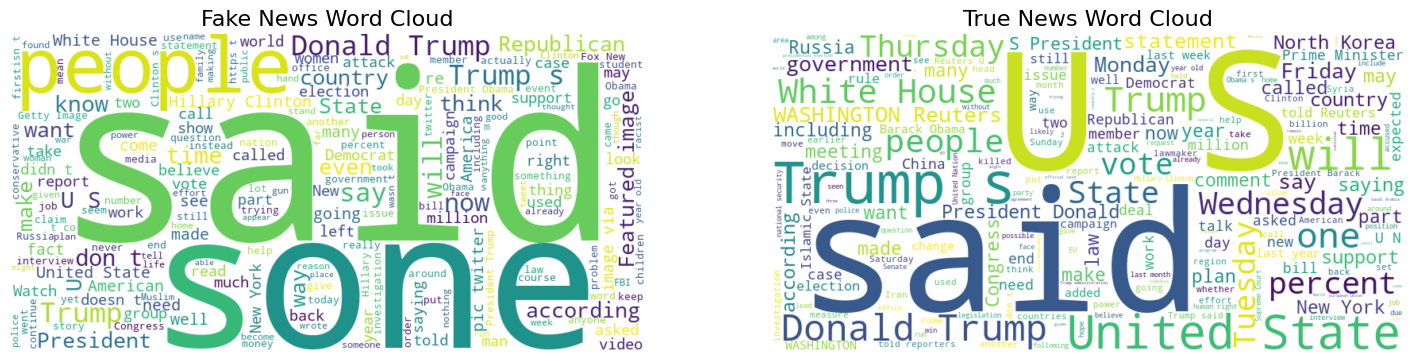

In [ ]:
# Combine all text for each class
fake_text = " ".join(data[data['label']=="FAKE"]['text'])
true_text = " ".join(data[data['label']=="TRUE"]['text'])

# Create word clouds
wc_fake = WordCloud(width=800, height=400, background_color="white").generate(fake_text)
wc_true = WordCloud(width=800, height=400, background_color="white").generate(true_text)

# Plot side by side
plt.figure(figsize=(18,8))

# Fake News
plt.subplot(1,2,1)
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News Word Cloud", fontsize=16)

# True News
plt.subplot(1,2,2)
plt.imshow(wc_true, interpolation="bilinear")
plt.axis("off")
plt.title("True News Word Cloud", fontsize=16)

plt.show()


### **Insights from Fake vs True News Word Clouds**

---

#### 1. Common Dominant Words
- Both **fake** and **true** news heavily feature:
  - **“said”**, **“Trump”**, **“people”**, **“United States”**, and **“according”**  
- This shows that:
  - Reported speech (who *said* what)  
  - References to political figures (especially Trump)  
  - Mentions of people and the U.S.  
  Are central in both fake and true news.

---

#### 2. Fake News Word Cloud
**Most prominent words:**  
*said, one, people, Trump, according, time, called, don’t, right, image, video*  

**Patterns:**
- Heavy use of **people**, **don’t**, **know**, **time**, **right** → conversational or opinion-based tone.  
- Words like **image**, **video**, **Twitter** → reliance on **visuals and social media**.  
- Mentions of **Hillary Clinton**, **Republican**, **Democrat** → strong **partisan focus**.  

**Implication:**  
Fake news leans toward **emotional, social, and partisan framing**, with references to multimedia.

---

#### 3. True News Word Cloud
**Most prominent words:**  
*US, said, Trump, United States, Tuesday, Wednesday, White House, vote, government*  

**Patterns:**
- Strong presence of **temporal markers** (*Tuesday, Wednesday, Thursday, Friday, Monday*) → fact-based reporting with **time-specific context**.  
- Words like **government, Congress, White House, million, percent, vote** → emphasis on **institutions, policies, and data**.  
- Mentions of **Reuters** and **according** → reliance on **news agencies and sourcing**.  

**Implication:**  
True news emphasizes **specific events, dates, official bodies, and data-driven details**.

---

#### 4. Stylistic Differences
- **Fake News**
  - Conversational, vague, emotional, social-media oriented.  
  - Uses more personal and speculative language.  
- **True News**
  - Factual, time-bound, institutional.  
  - Anchored in official reporting and statistics.  

---

#### Takeaway
- Fake news → *general people, opinions, and social media amplification*, less grounding in time or institutions.  
- True news → *anchored in verifiable details*, like **dates, institutions, and official sources**.


### **2.6 Summary of Findings**

The dataset contains **44,898 news articles**, evenly split between fake (52.3%) and true (47.7%) news, making it suitable for classification tasks.
Data quality is strong, with **no missing values** and only minor duplicate titles that do not affect analysis.
Articles span **8 subject categories** (most frequent: politicsNews) and cover **over 2,300 unique dates**, providing both topical and temporal diversity.

Exploratory word clouds highlight clear differences in writing style:  
- **Fake news** often uses a conversational, emotional, and partisan tone, with frequent mentions of social media and opinion-driven language.  
- **True news** emphasizes factual reporting, including dates, institutions (e.g., government, Congress), and references to reliable sources.  

**Overall, the dataset is clean, balanced, and rich in linguistic patterns, offering a strong foundation for text preprocessing and model development in fake news detection.**
